# This file will explore data of both file

# Read both file data

In [163]:
import pandas as pd


In [164]:
company  = pd.read_excel('Sales.xlsx')
competitor = pd.read_excel('Competitors.xlsx')

In [165]:
company.describe()

,Quantity,Sale
count,12.00000,12.000000
mean,580.00000,58.711650
std,152.06159,15.609208
min,330.00000,30.531600
25%,450.00000,46.260000
50%,580.00000,59.624000
75%,731.25000,69.762650
max,800.00000,82.240000


In [166]:
company.dtypes

Quarter      object
Quantity      int64
Sale        float64
dtype: object

In [167]:
competitor.describe()

,Quantity,Sales
count,4.600000e+01,4.600000e+01
mean,2.847015e+06,1.577141e+06
std,1.607217e+06,8.288000e+05
min,7.103210e+05,3.740611e+05
25%,1.974990e+06,8.904948e+05
50%,2.537260e+06,1.476243e+06
75%,3.275804e+06,1.914063e+06
max,8.837352e+06,4.124948e+06


In [168]:
competitor.dtypes

Year         object
Quantity      int64
Sales       float64
dtype: object

In [169]:
competitor['Year'] = pd.to_datetime(competitor['Year'], format='%Y-%m')

In [170]:
# Extract the quarter
competitor['Quarter'] = competitor['Year'].dt.to_period("Q")

# Group by quarter and calculate the sum of Quantity and Sales
competitor_edit = competitor.groupby('Quarter').agg({'Quantity': 'sum', 'Sales': 'sum'}).reset_index()


In [171]:
competitor_edit['Quarter'] = competitor_edit['Quarter'].dt.to_timestamp()


In [172]:
competitor_edit.dtypes

Quarter     datetime64[ns]
Quantity             int64
Sales              float64
dtype: object

# 1.Data mining

## 1.1 Company

In [173]:
company.describe()

,Quantity,Sale
count,12.00000,12.000000
mean,580.00000,58.711650
std,152.06159,15.609208
min,330.00000,30.531600
25%,450.00000,46.260000
50%,580.00000,59.624000
75%,731.25000,69.762650
max,800.00000,82.240000


In [174]:
#Check null
company.isnull().sum()

Quarter     0
Quantity    0
Sale        0
dtype: int64

### Sale

###  1.1.2 Plot

In [175]:
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

#### Histogram and Box plot

Text(0, 0.5, 'Count')

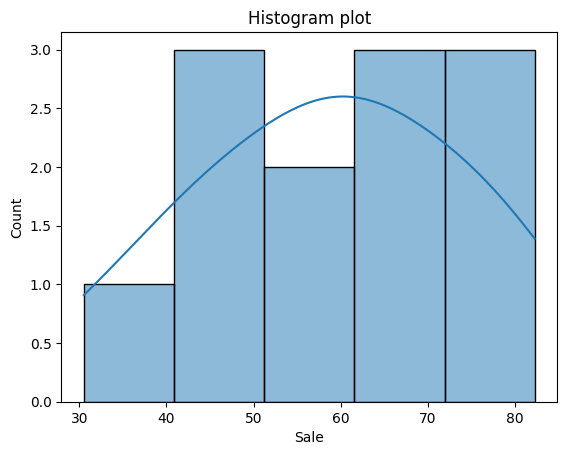

In [176]:
sns.histplot(company['Sale'], kde = True)
plt.title('Histogram plot')
plt.xlabel('Sale')
plt.ylabel('Count')

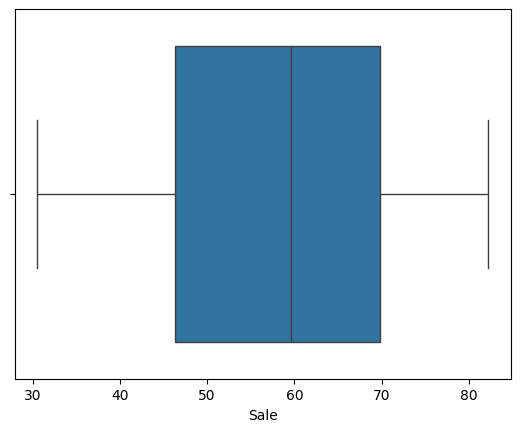

In [177]:
boxplot = sns.boxplot(x=company['Sale'])

# Calculate interquartile range
Q1 = company['Sale'].quantile(0.25)
Q3 = company['Sale'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = company[(company['Sale'] < lower_bound) | (company['Sale'] > upper_bound)]

# Annotate outliers
for i in outliers.index:
    boxplot.annotate('Outlier', xy=(0, outliers.loc[i, 'Sale']))
    
plt.show()

#### Line graph 

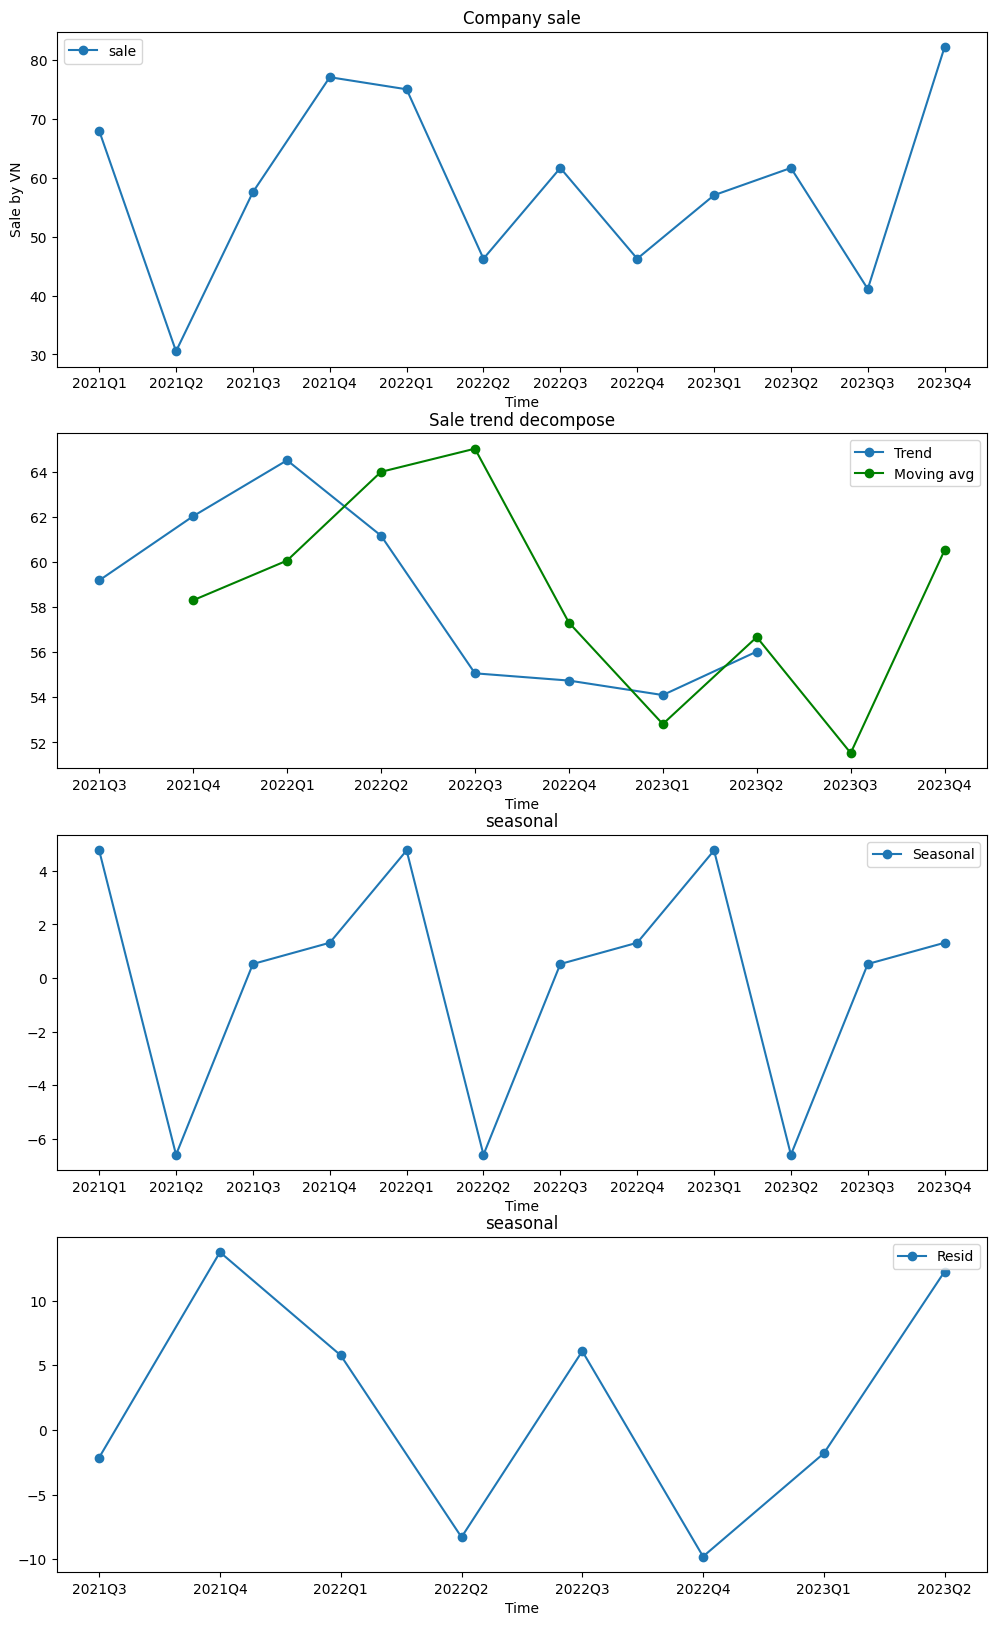

In [178]:
fig,ax = plt.subplots(4,1, figsize=(12,20))
sale_decompose = seasonal_decompose(company['Sale'], model='addictive', period=4)


#line graph of Company Sale
ax[0].plot(company['Quarter'],company['Sale'], marker = 'o',label ='sale')
ax[0].set_title('Company sale')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Sale by VN')
ax[0].legend()

#Trend
ax[1].plot(company['Quarter'],sale_decompose.trend,marker = 'o',label = 'Trend')
ax[1].set_title('Sale trend decompose')
ax[1].set_xlabel('Time')
#Moving average windown size = 4
ax[1].plot(company['Quarter'],company['Sale'].rolling(window = 4).mean(),marker = 'o',color = 'green',label ='Moving avg')
ax[1].legend()

#Seasonal
ax[2].plot(company['Quarter'],sale_decompose.seasonal, marker = 'o', label = 'Seasonal')
ax[2].set_title('seasonal')
ax[2].set_xlabel('Time')
ax[2].legend()

#Resid
ax[3].plot(company['Quarter'],sale_decompose.resid, marker = 'o', label = 'Resid')
ax[3].set_title('seasonal')
ax[3].set_xlabel('Time')
ax[3].legend()

### 1.1.3 Check Stationary 


Lib

In [179]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [180]:
sale_adf = adfuller(company['Sale'], autolag='AIC')
print(f"adf-statistic: {sale_adf[0]} \np_value {sale_adf[1]} \nlags_use: {sale_adf[2]}")
print('Critical Values: ')
for key, value in sale_adf[4].items():
    print('\t%s: %.3f' % (key,value))

adf-statistic: -3.3439152498333136 
p_value 0.013026007204626914 
lags_use: 4
Critical Values: 
	1%: -4.939
	5%: -3.478
	10%: -2.844


In [181]:
sale_diff = company['Sale'].diff().dropna()
sale_adf = adfuller(sale_diff, autolag='AIC')
print(f"adf-statistic: {sale_adf[0]} \np_value {sale_adf[1]} \nlags_use: {sale_adf[2]}")
print('Critical Values: ')
for key, value in sale_adf[4].items():
    print('\t%s: %.3f' % (key,value))

adf-statistic: -3.7037251935810813 
p_value 0.004061060030171576 
lags_use: 3
Critical Values: 
	1%: -4.939
	5%: -3.478
	10%: -2.844


#### PACF, ACF

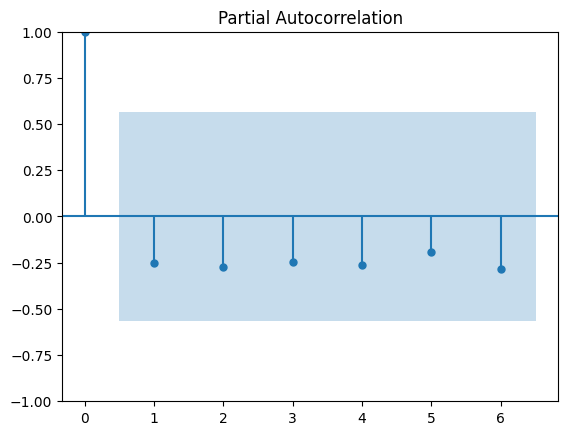

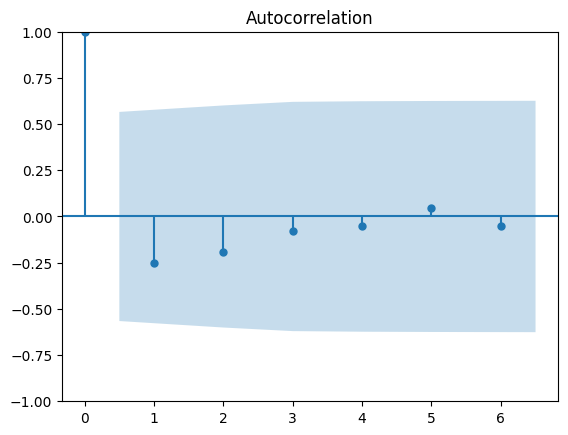

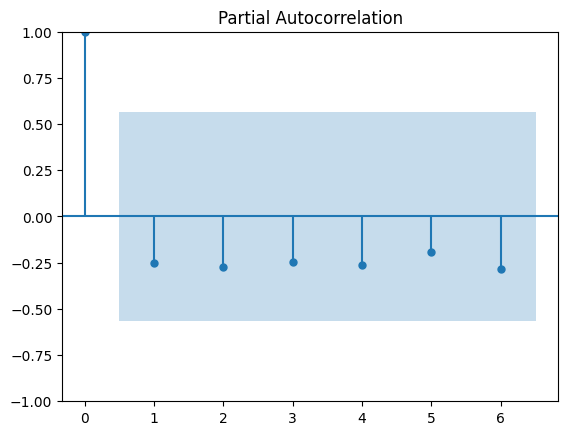

In [182]:
plot_acf(company['Sale'])
plot_pacf(company['Sale'])

### Quantity

### 1.1.2 Plot

#### Histogram and boxplot

Lib

In [183]:
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

Text(0, 0.5, 'Count')

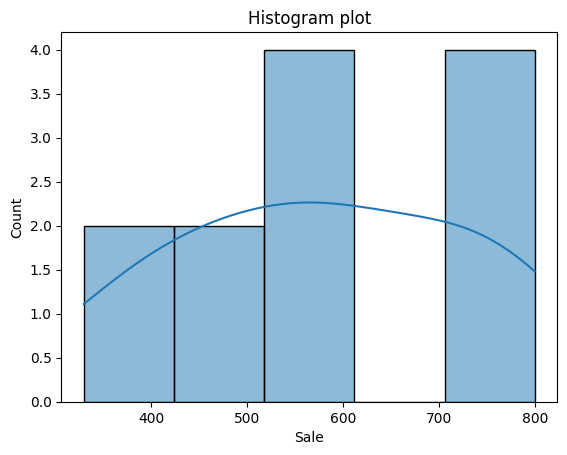

In [184]:
sns.histplot(company['Quantity'], kde = True)
plt.title('Histogram plot')
plt.xlabel('Sale')
plt.ylabel('Count')

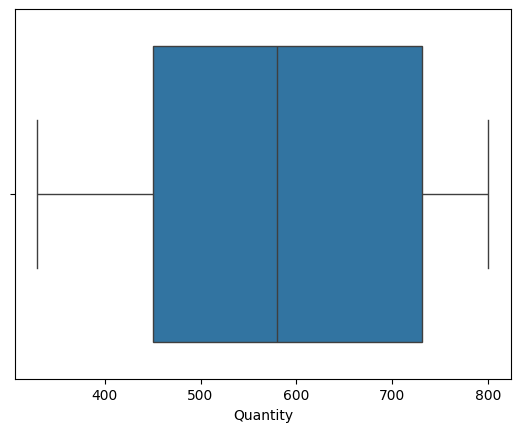

In [185]:
boxplot = sns.boxplot(x=company['Quantity'])

# Calculate interquartile range
Q1 = company['Quantity'].quantile(0.25)
Q3 = company['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = company[(company['Quantity'] < lower_bound) | (company['Quantity'] > upper_bound)]

# Annotate outliers
for i in outliers.index:
    boxplot.annotate('Outlier', xy=(0, outliers.loc[i, 'Quantity']))
    
plt.show()

#### Line


Text(0.5, 0, 'Time')

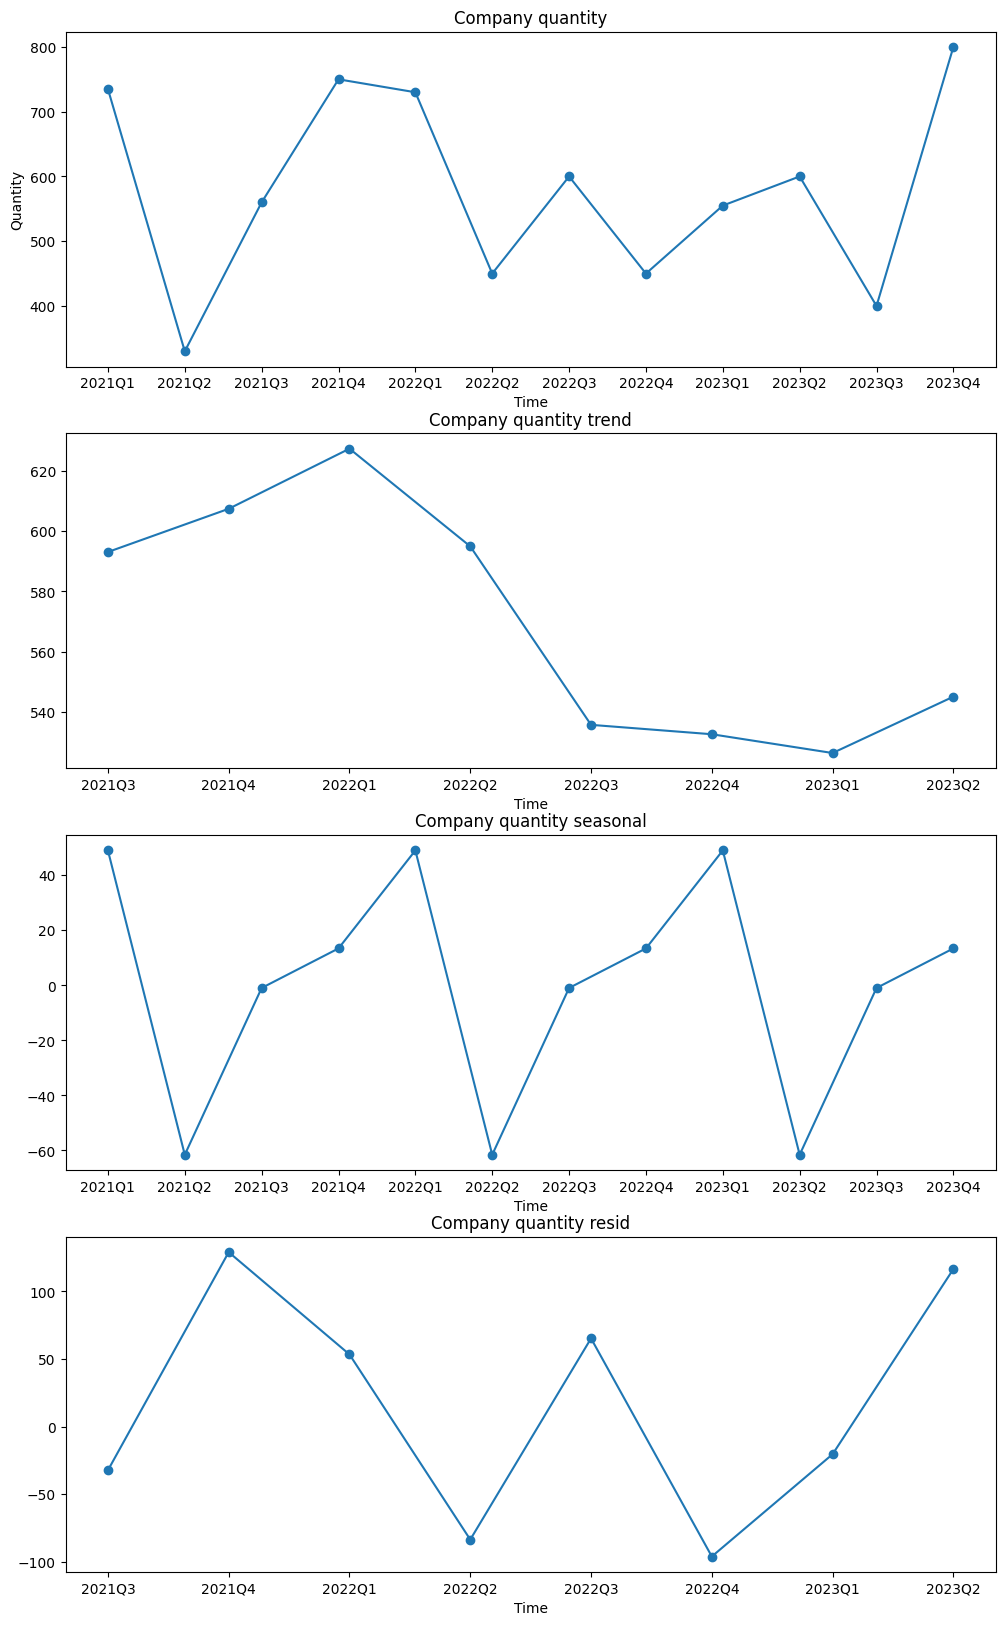

In [186]:
fig,ax = plt.subplots(4,1,figsize = (12,20))
quantity_decompose = seasonal_decompose(company['Quantity'],model='addictive',period=4)

#Company Quantity 
ax[0].plot(company['Quarter'],company['Quantity'],marker ='o',label ='Quantity')
ax[0].set_title('Company quantity')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Quantity')

#Quantity trend
ax[1].plot(company['Quarter'],quantity_decompose.trend,marker ='o',label ='Trend')
ax[1].set_title('Company quantity trend')
ax[1].set_xlabel('Time')

#Quantity seasonal 
ax[2].plot(company['Quarter'],quantity_decompose.seasonal,marker ='o',label ='seasonal')
ax[2].set_title('Company quantity seasonal')
ax[2].set_xlabel('Time')

#Quantity residual
ax[3].plot(company['Quarter'],quantity_decompose.resid,marker ='o',label ='resid')
ax[3].set_title('Company quantity resid')
ax[3].set_xlabel('Time')

### 1.1.3 Check stationary


In [187]:
quantity_adf = adfuller(company['Quantity'], autolag='AIC')
print(f"adf-statistic: {quantity_adf[0]} \np_value {quantity_adf[1]} \nlags_use: {quantity_adf[2]}")
print('Critical Values: ')
for key, value in quantity_adf[4].items():
    print('\t%s: %.3f' % (key,value))

adf-statistic: -3.5590826851859325 
p_value 0.006593221180946816 
lags_use: 4
Critical Values: 
	1%: -4.939
	5%: -3.478
	10%: -2.844


## 1.2 Competitors

### 1.2.1 Overall

In [188]:
competitor['Year'] = pd.to_datetime(competitor['Year'], format='%Y-%m')
competitor.dtypes

Year        datetime64[ns]
Quantity             int64
Sales              float64
Quarter      period[Q-DEC]
dtype: object

In [189]:
competitor.describe()

,Year,Quantity,Sales
count,46,4.600000e+01,4.600000e+01
mean,2021-11-15 12:31:18.260869632,2.847015e+06,1.577141e+06
min,2020-01-01 00:00:00,7.103210e+05,3.740611e+05
25%,2020-12-08 18:00:00,1.974990e+06,8.904948e+05
50%,2021-11-16 00:00:00,2.537260e+06,1.476243e+06
75%,2022-10-24 06:00:00,3.275804e+06,1.914063e+06
max,2023-10-01 00:00:00,8.837352e+06,4.124948e+06
std,NaN,1.607217e+06,8.288000e+05


In [190]:
competitor.isnull().sum()

Year        0
Quantity    0
Sales       0
Quarter     0
dtype: int64

Sale

### 1.2.1 Plot


#### Histogram and Boxplot

Text(0, 0.5, 'Count')

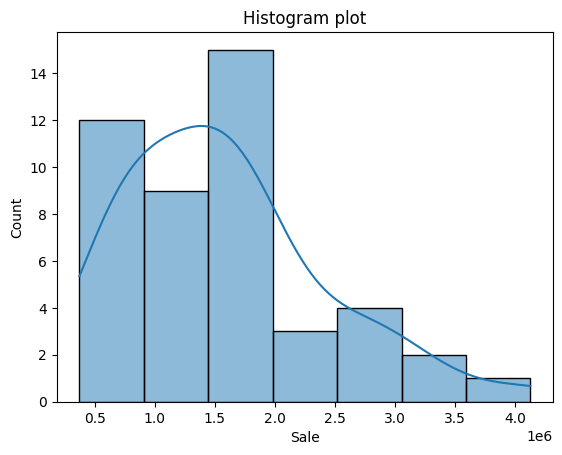

In [191]:
sns.histplot(competitor['Sales'], kde = True)
plt.title('Histogram plot')
plt.xlabel('Sale')
plt.ylabel('Count')

C:\Users\nguye\AppData\Local\Temp\ipykernel_16852\3749118278.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = company[(competitor['Sales'] < lower_bound) | (competitor['Sales'] > upper_bound)]


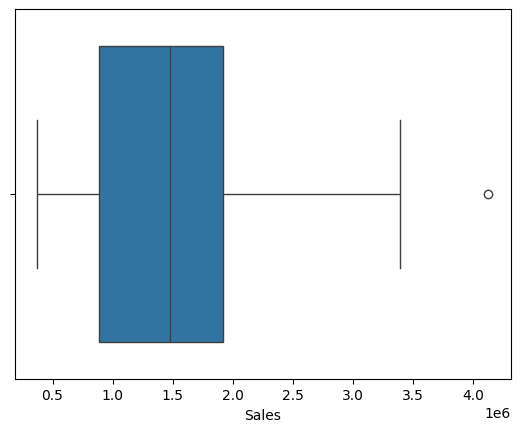

In [192]:
boxplot = sns.boxplot(x=competitor['Sales'])

# Calculate interquartile range
Q1 = competitor['Sales'].quantile(0.25)
Q3 = competitor['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = company[(competitor['Sales'] < lower_bound) | (competitor['Sales'] > upper_bound)]

# Annotate outliers
for i in outliers.index:
    boxplot.annotate('Outlier', xy=(0, outliers.loc[i, 'Sale']))
    
plt.show()

#### Line graph

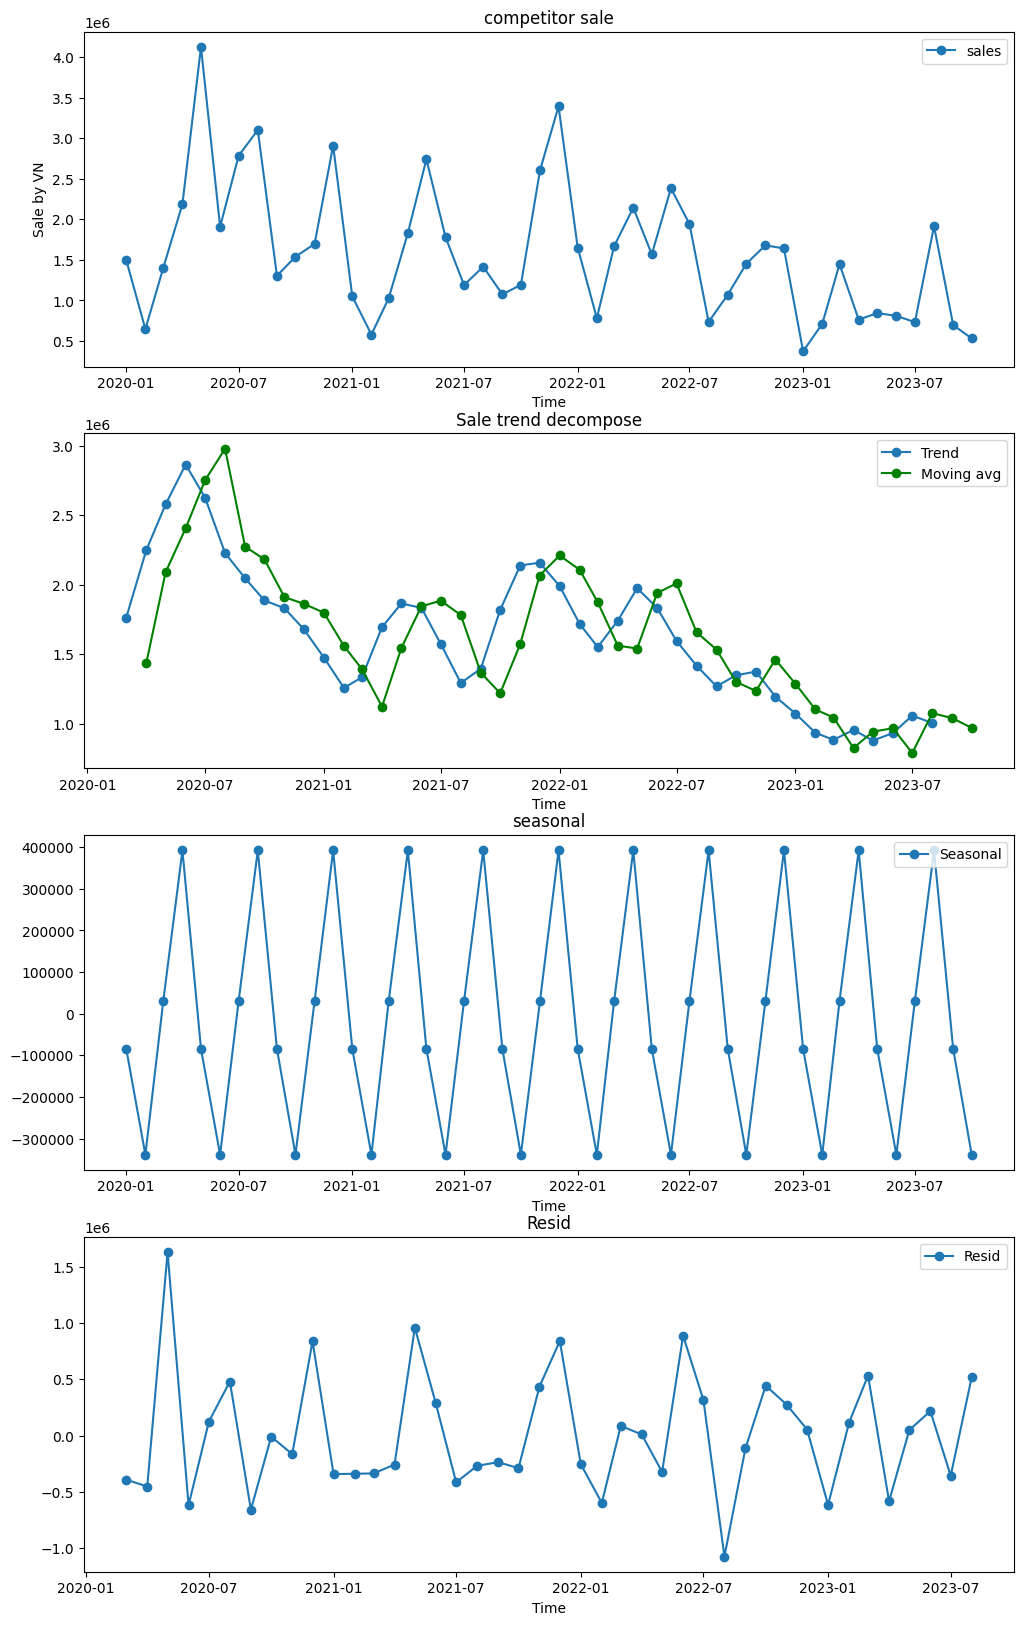

In [193]:
fig,ax = plt.subplots(4,1, figsize=(12,20))
sale_decompose = seasonal_decompose(competitor['Sales'], model='addictive', period=4)


#line graph of competitor Sale
ax[0].plot(competitor['Year'],competitor['Sales'], marker = 'o',label ='sales')
ax[0].set_title('competitor sale')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Sale by VN')
ax[0].legend()

#Trend
ax[1].plot(competitor['Year'],sale_decompose.trend,marker = 'o',label = 'Trend')
ax[1].set_title('Sale trend decompose')
ax[1].set_xlabel('Time')
#Moving average windown size = 4
ax[1].plot(competitor['Year'],competitor['Sales'].rolling(window = 4).mean(),marker = 'o',color = 'green',label ='Moving avg')
ax[1].legend()


#Seasonal
ax[2].plot(competitor['Year'],sale_decompose.seasonal, marker = 'o', label = 'Seasonal')
ax[2].set_title('seasonal')
ax[2].set_xlabel('Time')
ax[2].legend()


#Resid
ax[3].plot(competitor['Year'],sale_decompose.resid, marker = 'o', label = 'Resid')
ax[3].set_title('Resid')
ax[3].set_xlabel('Time')
ax[3].legend()



### 1.2.3 Check Stationary


In [214]:
sale_adf_1= adfuller(competitor['Sales'], autolag='AIC')
print(f"adf-statistic: {sale_adf_1[0]} \np_value {sale_adf_1[1]} \nlags_use: {sale_adf_1[2]}")
print('Critical Values: ')
for key, value in sale_adf_1[4].items():
    print('\t%s: %.3f' % (key,value))

adf-statistic: -4.296073422351235 
p_value 0.000451218880692916 
lags_use: 1
Critical Values: 
	1%: -3.589
	5%: -2.930
	10%: -2.603


Quantity


### 1.2.1 Plot

#### Histogram and Boxplot

Text(0.5, 1.0, 'Histogram of competitor quantity')

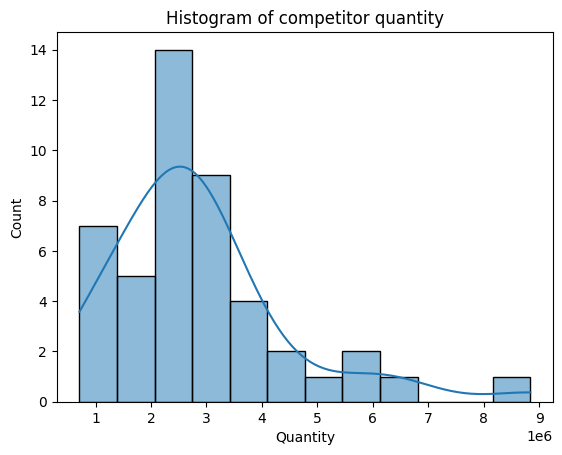

In [195]:
sns.histplot(competitor['Quantity'],kde = True) 
plt.title("Histogram of competitor quantity")

C:\Users\nguye\AppData\Local\Temp\ipykernel_16852\1917006985.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = company[(competitor['Quantity'] < lower_bound) | (competitor['Quantity'] > upper_bound)]


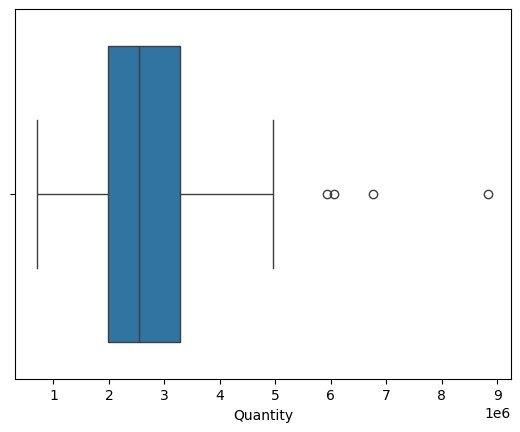

In [196]:
boxplot = sns.boxplot(x=competitor['Quantity'])

# Calculate interquartile range
Q1 = competitor['Quantity'].quantile(0.25)
Q3 = competitor['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = company[(competitor['Quantity'] < lower_bound) | (competitor['Quantity'] > upper_bound)]

# Annotate outliers
for i in outliers.index:
    boxplot.annotate('Outlier', xy=(0, outliers.loc[i, 'Quantity']))
    
plt.show()

##### Handle the outlier by cliping

In [197]:
competitor['Quantity_clip'] = competitor['Quantity'].clip(upper=upper_bound, lower=lower_bound)
competitor.head(5)

,Year,Quantity,Sales,Quarter,Quantity_clip
0,2020-01-01,1939043,1.498821e+06,2020Q1,1939043.000
1,2020-02-01,1013651,6.475269e+05,2020Q1,1013651.000
2,2020-03-01,2451126,1.403030e+06,2020Q1,2451126.000
3,2020-04-01,2989985,2.189583e+06,2020Q2,2989985.000
4,2020-05-01,6049315,4.124948e+06,2020Q2,5227025.875


C:\Users\nguye\AppData\Local\Temp\ipykernel_16852\883551029.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = company[(competitor['Quantity_clip'] < lower_bound) | (competitor['Quantity_clip'] > upper_bound)]


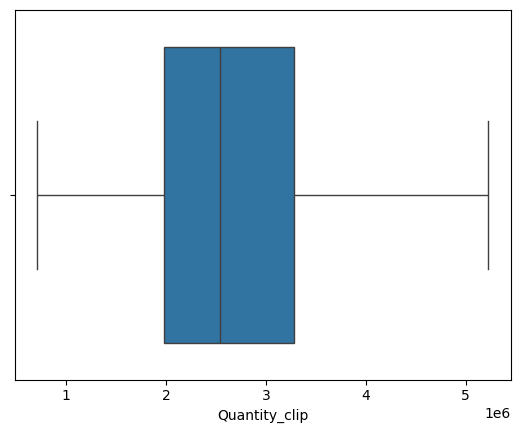

In [198]:
boxplot = sns.boxplot(x=competitor['Quantity_clip'])

# Calculate interquartile range
Q1 = competitor['Quantity_clip'].quantile(0.25)
Q3 = competitor['Quantity_clip'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = company[(competitor['Quantity_clip'] < lower_bound) | (competitor['Quantity_clip'] > upper_bound)]

# Annotate outliers
for i in outliers.index:
    boxplot.annotate('Outlier', xy=(0, outliers.loc[i, 'Quantity_clip']))
    
plt.show()

#### Line graph

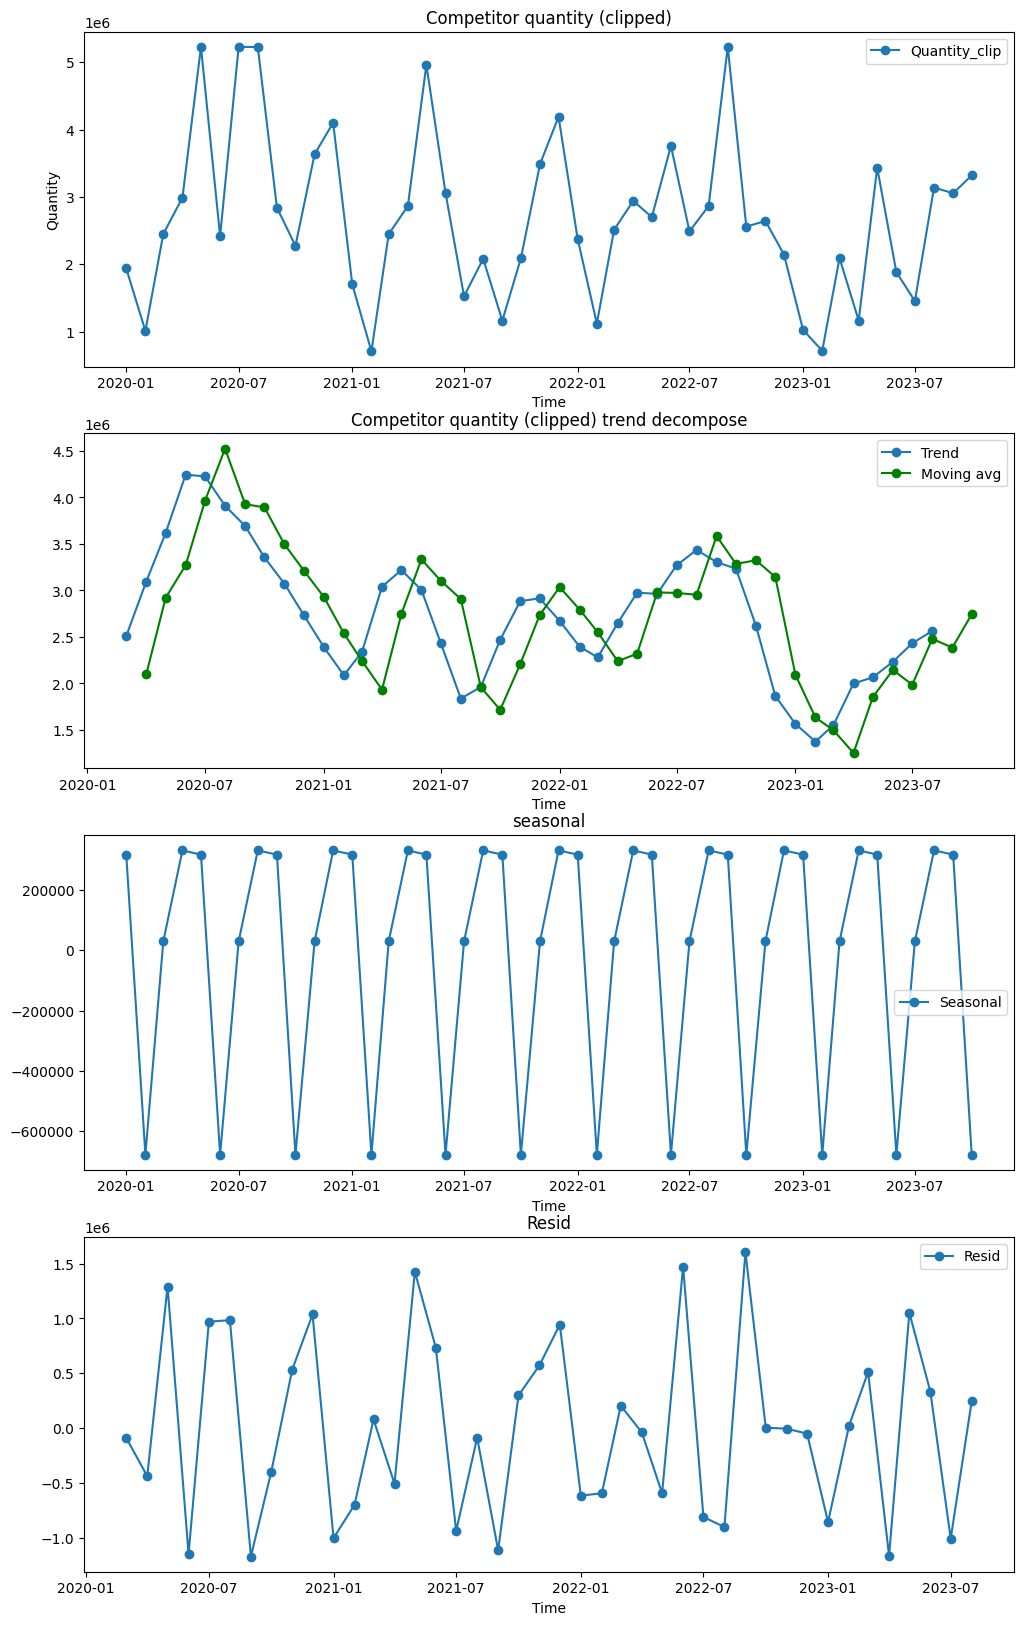

In [199]:
fig,ax = plt.subplots(4,1, figsize=(12,20))
quantity_decompose = seasonal_decompose(competitor['Quantity_clip'], model='addictive', period=4)


#line graph of competitor Sale
ax[0].plot(competitor['Year'],competitor['Quantity_clip'], marker = 'o',label ='Quantity_clip')
ax[0].set_title('Competitor quantity (clipped)')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Quantity')
ax[0].legend()

#Trend
ax[1].plot(competitor['Year'],quantity_decompose.trend,marker = 'o',label = 'Trend')
ax[1].set_title('Competitor quantity (clipped) trend decompose')
ax[1].set_xlabel('Time')
#Moving average windown size = 4
ax[1].plot(competitor['Year'],competitor['Quantity_clip'].rolling(window = 4).mean(),marker = 'o',color = 'green',label ='Moving avg')
ax[1].legend()


#Seasonal
ax[2].plot(competitor['Year'],quantity_decompose.seasonal, marker = 'o', label = 'Seasonal')
ax[2].set_title('seasonal')
ax[2].set_xlabel('Time')
ax[2].legend()


#Resid
ax[3].plot(competitor['Year'],quantity_decompose.resid, marker = 'o', label = 'Resid')
ax[3].set_title('Resid')
ax[3].set_xlabel('Time')
ax[3].legend()



### 1.2.3 Check Stationary

In [200]:
quantity_adf_1= adfuller(competitor['Quantity_clip'], autolag='AIC')
print(f"adf-statistic: {quantity_adf[0]} \np_value {quantity_adf[1]} \nlags_use: {quantity_adf[2]}")
print('Critical Values: ')
for key, value in quantity_adf[4].items():
    print('\t%s: %.3f' % (key,value))

adf-statistic: -3.5590826851859325 
p_value 0.006593221180946816 
lags_use: 4
Critical Values: 
	1%: -4.939
	5%: -3.478
	10%: -2.844


# 2.Explore more

In [201]:
data = pd.read_excel('quarterly_data.xlsx')
data.head(5)

,Year,Competitor_Quantity,Competitor_Sales,Company_Quantity,Company_Sales
0,2020Q1,5403820,3.549378e+06,NaN,NaN
1,2020Q2,10635856,8.224064e+06,NaN,NaN
2,2020Q3,13296226,7.190059e+06,NaN,NaN
3,2020Q4,10013404,6.146164e+06,NaN,NaN
4,2021Q1,4864172,2.660089e+06,735.0,68.0022


In [202]:
data.describe()

,Competitor_Quantity,Competitor_Sales,Company_Quantity,Company_Sales
count,1.600000e+01,1.600000e+01,12.00000,12.000000
mean,7.768253e+06,4.534280e+06,580.00000,58.711650
std,2.958333e+06,2.129444e+06,152.06159,15.609208
min,3.320751e+06,5.328180e+05,330.00000,30.531600
25%,5.268908e+06,3.174025e+06,450.00000,46.260000
50%,7.501418e+06,3.926783e+06,580.00000,59.624000
75%,1.015576e+07,6.197313e+06,731.25000,69.762650
max,1.329623e+07,8.224064e+06,800.00000,82.240000


In [203]:
data['Year'] = pd.to_datetime(data['Year'])

C:\Users\nguye\AppData\Local\Temp\ipykernel_16852\3320104901.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Year'] = pd.to_datetime(data['Year'])


In [204]:
data.set_index('Year', inplace=True)

In [205]:
data_cleaned = data.dropna()
data_cleaned.head(5)


,Competitor_Quantity,Competitor_Sales,Company_Quantity,Company_Sales
Year,,,,
2021-01-01,4864172,2.660089e+06,735.0,68.0022
2021-04-01,10889213,6.350758e+06,330.0,30.5316
2021-07-01,4774831,3.683155e+06,560.0,57.5680
2021-10-01,9768208,7.189822e+06,750.0,77.1000
2022-01-01,6012674,4.103657e+06,730.0,75.0440


## 2.1 Covarian Matrix


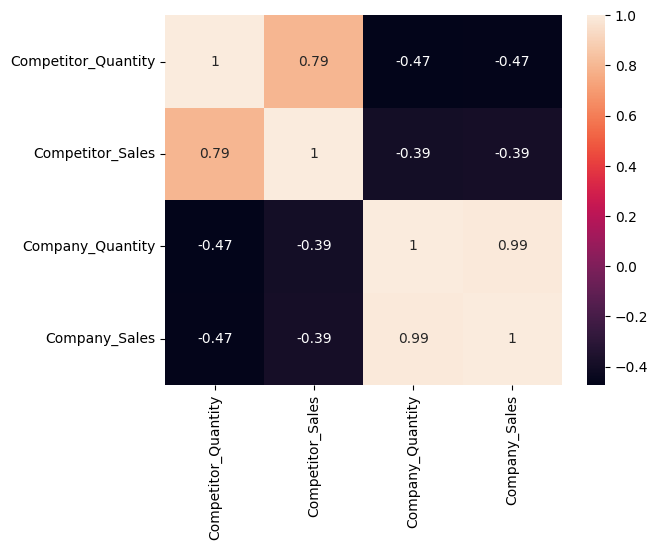

In [206]:
corr_matrix = data_cleaned[['Competitor_Quantity','Competitor_Sales', 'Company_Quantity','Company_Sales']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Lib

In [207]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import ccf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## PACF,ACF univariate

PACF 

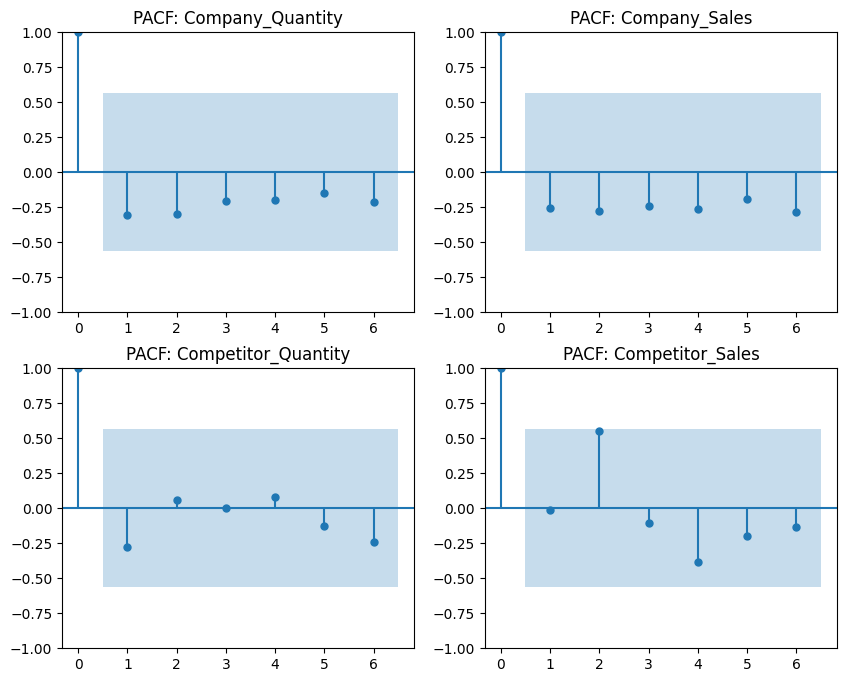

In [208]:

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# PACF for series 1 x series 1
plot_pacf(data_cleaned['Company_Quantity'], lags=6, ax=ax[0][0], title='PACF: Company_Quantity')

# PACF for series 1 x series 2
plot_pacf(data_cleaned['Company_Sales'], lags=6, ax=ax[0][1], title='PACF: Company_Sales')

# PACF for series 2 x series 1
plot_pacf(data_cleaned['Competitor_Quantity'], lags=6, ax=ax[1][0], title='PACF: Competitor_Quantity')

# PACF for series 2 x series 2
plot_pacf(data_cleaned['Competitor_Sales'], lags=6, ax=ax[1][1], title='PACF: Competitor_Sales')
plt.show()


Text(0.5, 0, 'Time')

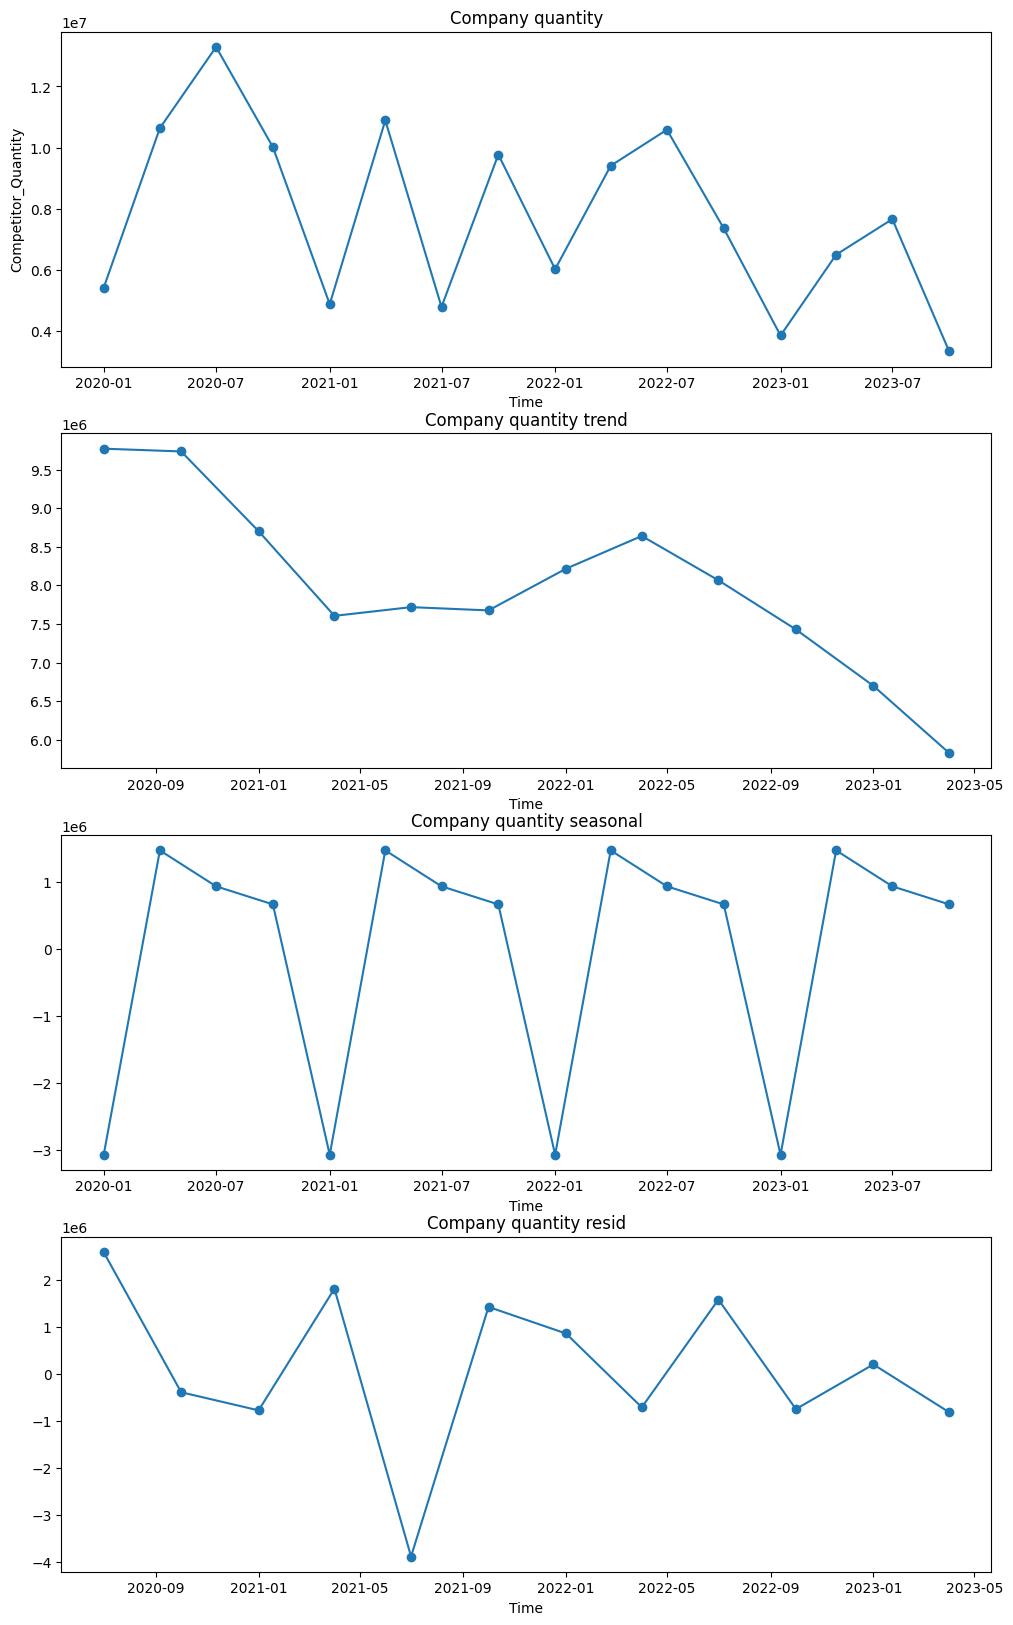

In [209]:
fig,ax = plt.subplots(4,1,figsize = (12,20))
quantity_decompose = seasonal_decompose(data['Competitor_Quantity'],model='addictive',period=4)

#Company Quantity 
ax[0].plot(data['Competitor_Quantity'],marker ='o',label ='Competitor_Quantity')
ax[0].set_title('Company quantity')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Competitor_Quantity')

#Quantity trend
ax[1].plot(quantity_decompose.trend,marker ='o',label ='Trend')
ax[1].set_title('Company quantity trend')
ax[1].set_xlabel('Time')

#Quantity seasonal 
ax[2].plot(quantity_decompose.seasonal,marker ='o',label ='seasonal')
ax[2].set_title('Company quantity seasonal')
ax[2].set_xlabel('Time')

#Quantity residual
ax[3].plot(quantity_decompose.resid,marker ='o',label ='resid')
ax[3].set_title('Company quantity resid')
ax[3].set_xlabel('Time')

ACF


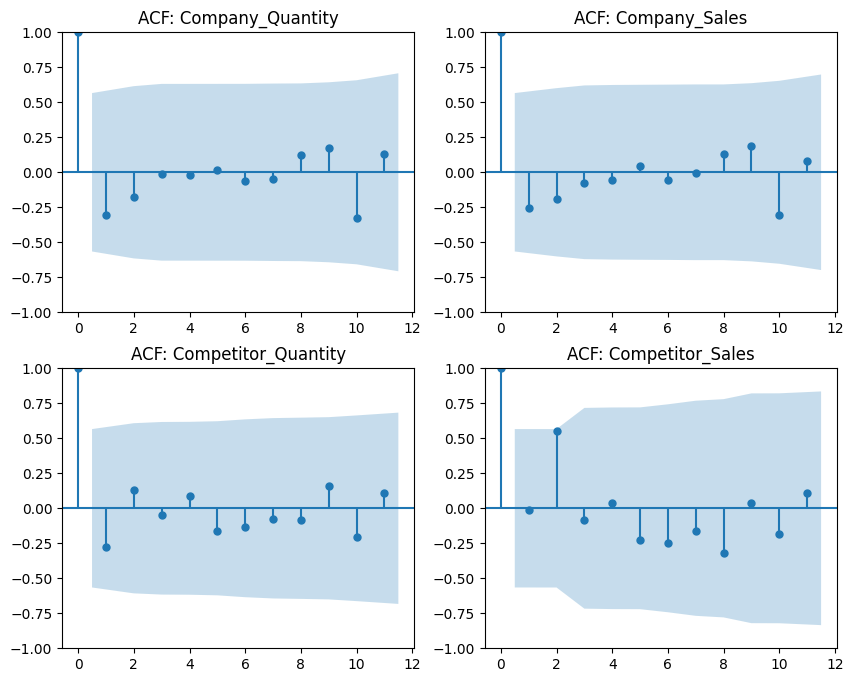

In [210]:

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# ACF for series 1 x series 1
plot_acf(data_cleaned['Company_Quantity'], lags=11, ax=ax[0][0], title='ACF: Company_Quantity')

# ACF for series 1 x series 2
plot_acf(data_cleaned['Company_Sales'], lags=11, ax=ax[0][1], title='ACF: Company_Sales')

# ACF for series 2 x series 1
plot_acf(data_cleaned['Competitor_Quantity'], lags=11, ax=ax[1][0], title='ACF: Competitor_Quantity')

# ACF for series 2 x series 2
plot_acf(data_cleaned['Competitor_Sales'], lags=11, ax=ax[1][1], title='ACF: Competitor_Sales')
plt.show()


## Cross Correlation

### Sales

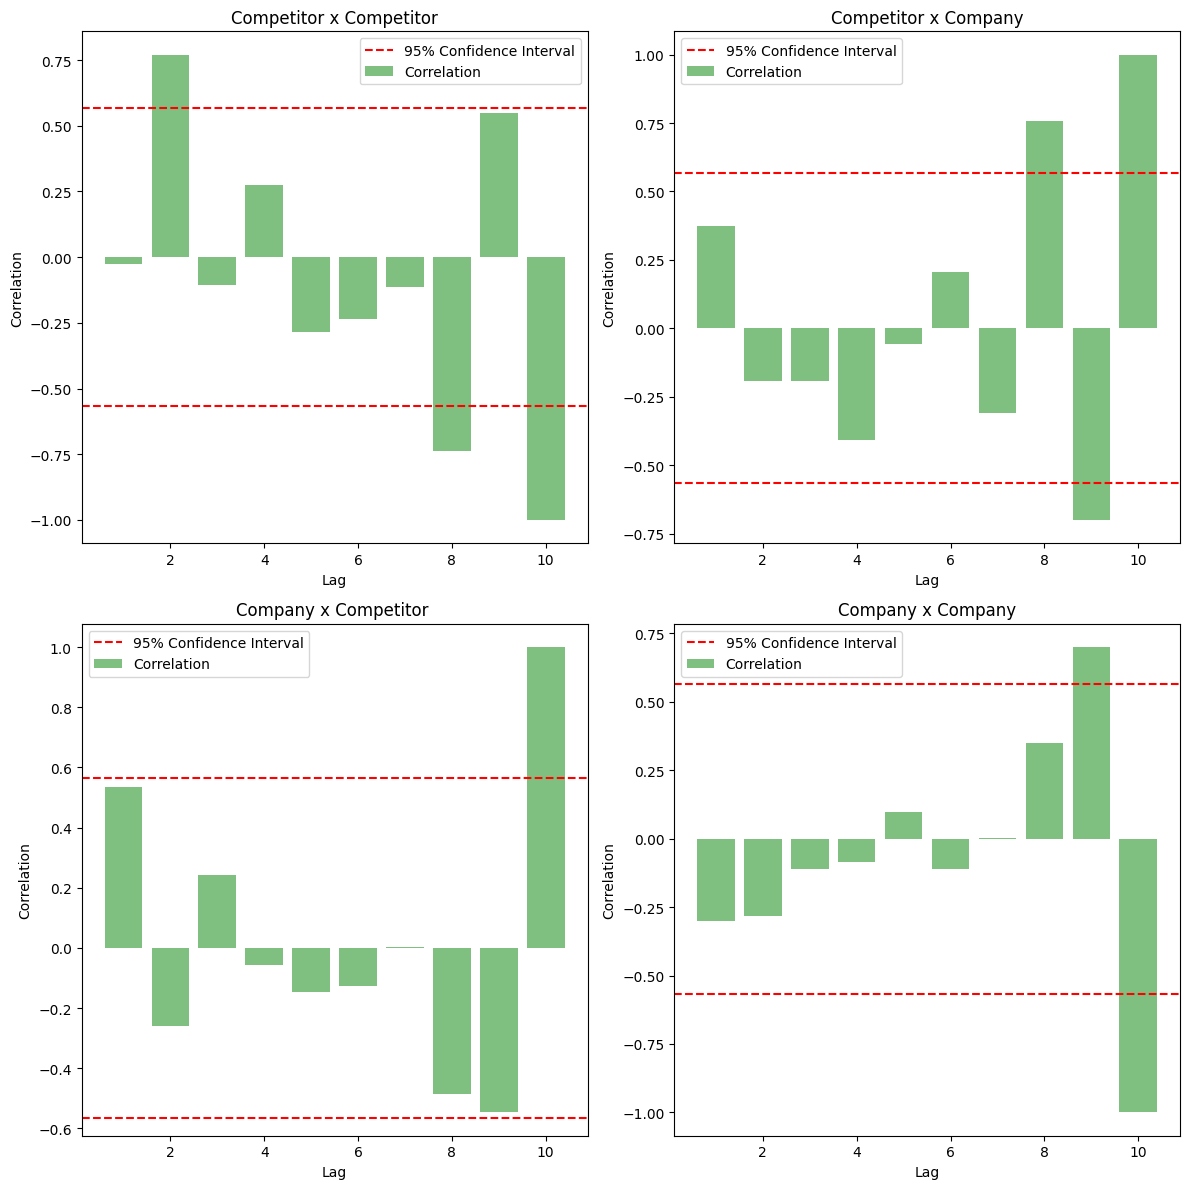

In [211]:


# Assuming data_cleaned is your DataFrame with columns 'Company_Quantity' and 'Competitor_Quantity'
company_quantity = data_cleaned['Company_Sales']
competitor_quantity = data_cleaned['Competitor_Sales']

# Specify the maximum lag you want to consider
max_lag = 10

# Calculate autocorrelations at different lags for both cases
correlations_12 = [competitor_quantity.corr(company_quantity.shift(-lag)) for lag in range(1, max_lag + 1)]
correlations_21 = [company_quantity.corr(competitor_quantity.shift(-lag)) for lag in range(1, max_lag + 1)]
correlations_22 = [company_quantity.corr(company_quantity.shift(-lag)) for lag in range(1, max_lag + 1)]
correlations_11 = [competitor_quantity.corr(competitor_quantity.shift(-lag)) for lag in range(1, max_lag + 1)]


# Calculate confidence intervals
nobs = len(company_quantity)
confidence_intervals = 1.96 / np.sqrt(nobs)  # 95% confidence interval

# Plot both correlations in one subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))



# Plot for Competitor x Competitor
axes[0,0].bar(range(1, max_lag + 1), correlations_11, color='green', alpha=0.5, label='Correlation')
axes[0,0].axhline(y=confidence_intervals, color='r', linestyle='--', label='95% Confidence Interval')
axes[0,0].axhline(y=-confidence_intervals, color='r', linestyle='--')
axes[0,0].set_title('Competitor x Competitor')
axes[0,0].set_xlabel('Lag')
axes[0,0].set_ylabel('Correlation')
axes[0,0].legend()

# Plot for Competitor x Company
axes[0,1].bar(range(1, max_lag + 1), correlations_12, color='green', alpha=0.5, label='Correlation')
axes[0,1].axhline(y=confidence_intervals, color='r', linestyle='--', label='95% Confidence Interval')
axes[0,1].axhline(y=-confidence_intervals, color='r', linestyle='--')
axes[0,1].set_title('Competitor x Company')
axes[0,1].set_xlabel('Lag')
axes[0,1].set_ylabel('Correlation')
axes[0,1].legend()

# Plot for Company x Competitor
axes[1,0].bar(range(1, max_lag + 1), correlations_21, color='green', alpha=0.5, label='Correlation')
axes[1,0].axhline(y=confidence_intervals, color='r', linestyle='--', label='95% Confidence Interval')
axes[1,0].axhline(y=-confidence_intervals, color='r', linestyle='--')
axes[1,0].set_title('Company x Competitor ')
axes[1,0].set_xlabel('Lag')
axes[1,0].set_ylabel('Correlation')
axes[1,0].legend()

# Plot for Competitor x Competitor
axes[1,1].bar(range(1, max_lag + 1), correlations_22, color='green', alpha=0.5, label='Correlation')
axes[1,1].axhline(y=confidence_intervals, color='r', linestyle='--', label='95% Confidence Interval')
axes[1,1].axhline(y=-confidence_intervals, color='r', linestyle='--')
axes[1,1].set_title('Company x Company')
axes[1,1].set_xlabel('Lag')
axes[1,1].set_ylabel('Correlation')
axes[1,1].legend()

plt.tight_layout()
plt.show()


### Quantity

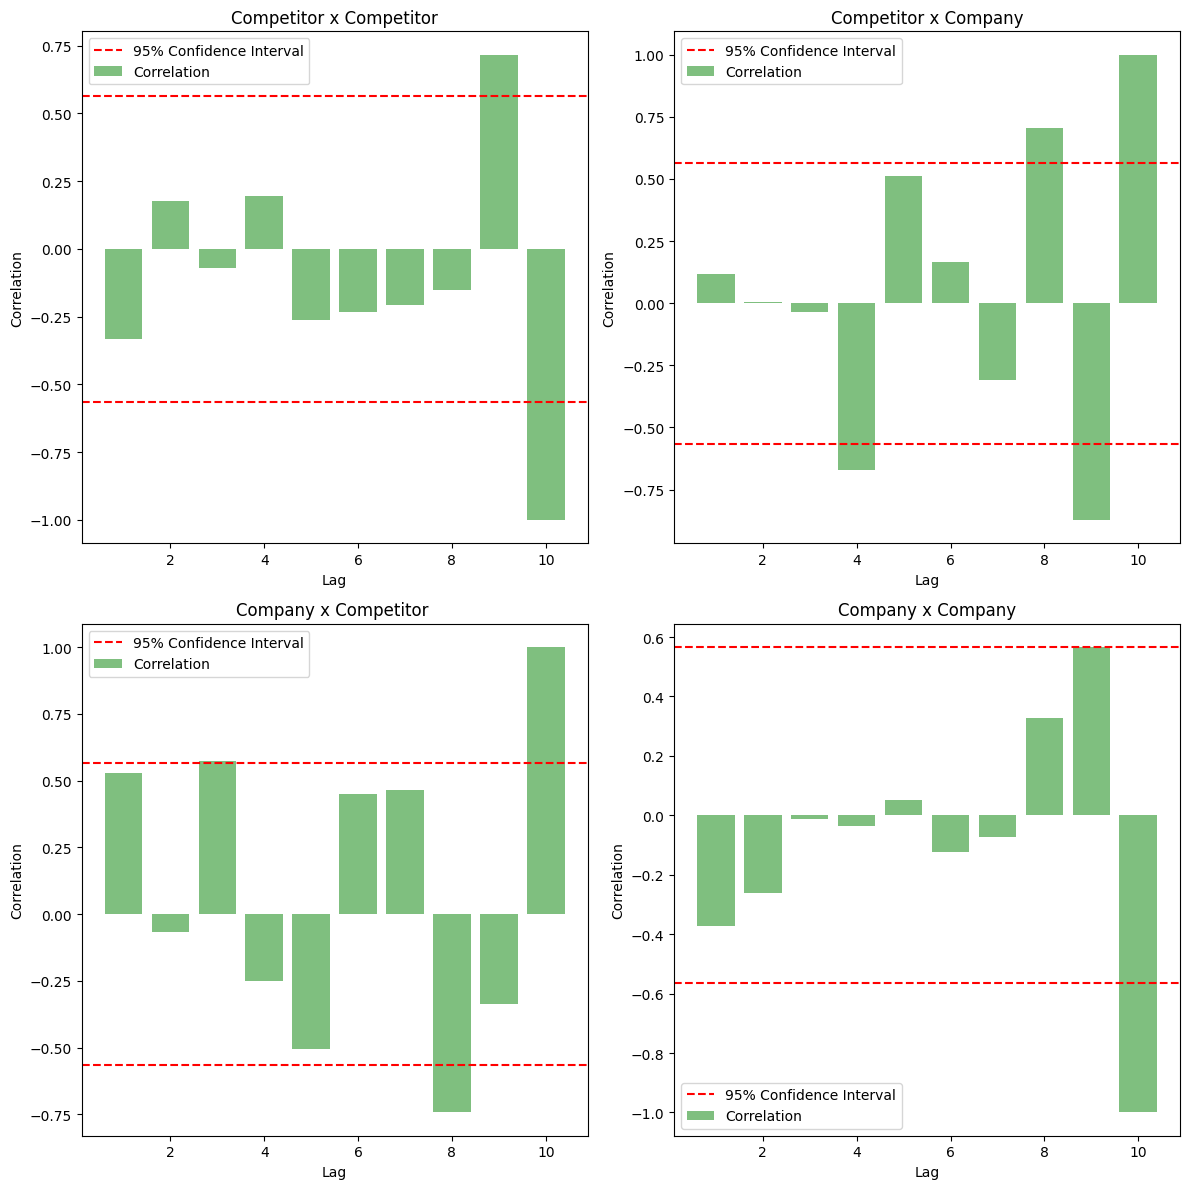

In [212]:


# Assuming data_cleaned is your DataFrame with columns 'Company_Quantity' and 'Competitor_Quantity'
company_quantity = data_cleaned['Company_Quantity']
competitor_quantity = data_cleaned['Competitor_Quantity']

# Specify the maximum lag you want to consider
max_lag = 10

# Calculate autocorrelations at different lags for both cases
correlations_12 = [competitor_quantity.corr(company_quantity.shift(-lag)) for lag in range(1, max_lag + 1)]
correlations_21 = [company_quantity.corr(competitor_quantity.shift(-lag)) for lag in range(1, max_lag + 1)]
correlations_22 = [company_quantity.corr(company_quantity.shift(-lag)) for lag in range(1, max_lag + 1)]
correlations_11 = [competitor_quantity.corr(competitor_quantity.shift(-lag)) for lag in range(1, max_lag + 1)]


# Calculate confidence intervals
nobs = len(company_quantity)
confidence_intervals = 1.96 / np.sqrt(nobs)  # 95% confidence interval

# Plot both correlations in one subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))



# Plot for Competitor x Competitor
axes[0,0].bar(range(1, max_lag + 1), correlations_11, color='green', alpha=0.5, label='Correlation')
axes[0,0].axhline(y=confidence_intervals, color='r', linestyle='--', label='95% Confidence Interval')
axes[0,0].axhline(y=-confidence_intervals, color='r', linestyle='--')
axes[0,0].set_title('Competitor x Competitor')
axes[0,0].set_xlabel('Lag')
axes[0,0].set_ylabel('Correlation')
axes[0,0].legend()

# Plot for Competitor x Company
axes[0,1].bar(range(1, max_lag + 1), correlations_12, color='green', alpha=0.5, label='Correlation')
axes[0,1].axhline(y=confidence_intervals, color='r', linestyle='--', label='95% Confidence Interval')
axes[0,1].axhline(y=-confidence_intervals, color='r', linestyle='--')
axes[0,1].set_title('Competitor x Company')
axes[0,1].set_xlabel('Lag')
axes[0,1].set_ylabel('Correlation')
axes[0,1].legend()

# Plot for Company x Competitor
axes[1,0].bar(range(1, max_lag + 1), correlations_21, color='green', alpha=0.5, label='Correlation')
axes[1,0].axhline(y=confidence_intervals, color='r', linestyle='--', label='95% Confidence Interval')
axes[1,0].axhline(y=-confidence_intervals, color='r', linestyle='--')
axes[1,0].set_title('Company x Competitor ')
axes[1,0].set_xlabel('Lag')
axes[1,0].set_ylabel('Correlation')
axes[1,0].legend()

# Plot for Competitor x Competitor
axes[1,1].bar(range(1, max_lag + 1), correlations_22, color='green', alpha=0.5, label='Correlation')
axes[1,1].axhline(y=confidence_intervals, color='r', linestyle='--', label='95% Confidence Interval')
axes[1,1].axhline(y=-confidence_intervals, color='r', linestyle='--')
axes[1,1].set_title('Company x Company')
axes[1,1].set_xlabel('Lag')
axes[1,1].set_ylabel('Correlation')
axes[1,1].legend()

plt.tight_layout()
plt.show()
